# Cleaning and Analyzing the Exit Surveys from Employees of DETE and TAFE Institute in Queensland, Australia

## 1. Introduction
The project involves cleaning and analyzing exit surveys from employee of **DETE**  (Department of Education, Training and Employment __[link](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)__) and **TAFE** (Technical and Further Education __[link](https://data.gov.au/error?errorCode=404&recordType=Dataset&recordId=%22ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e%22)__) institutes.

`In this project we want to find out answers for two prominent questions:`

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will combine the results for both the surveys to answer the above questions.

In [1]:
#import all the necessary modules
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#read in the data files
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

#print information and first few rows of data 'dete'
print(dete_survey.info())
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The Data of `DETE` institute has *56 columns* and *822 rows*. Data shows that only one column is *int type*, other columns are either *string type* (37 columns) or *bool type* (18 columns). Most of the columns have non-null values above 735. Column *Classification* has 455 non-null values and column *business Unit* has just *126* non-null values. The last five columns have either single/double digit non-null values.

In [3]:
#checking the entries of column 'Business Unit'
dete_survey['Business Unit'].value_counts()

Business Unit
Education Queensland                          54
Information and Technologies                  26
Training and Tertiary Education Queensland    12
Other                                         11
Human Resources                                6
Corporate Strategy and Peformance              5
Early Childhood Education and Care             3
Policy, Research, Legislation                  2
Infrastructure                                 2
Corporate Procurement                          1
Pacific Pines SHS                              1
Finance                                        1
Calliope State School                          1
Indigenous Education and Training Futures      1
Name: count, dtype: int64

In [4]:
#print information and first few rows of data 'TAFE'
print(tafe_survey.info())
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The data of `TAFE` institute shows that there are *702 rows* and *72 columns*. Among these, 2 columns are of *float type* and 70 columns are *string type*. Almost all of these columns have above 430 non-null values except one `Main Factor`, which has just 113 non-null values.  

## 2. Identifying Missing Values and Dropping Unnecessary Columns

We observe that there are values called `Not Stated` in *dete_survey* dataframe. These indicate missing values and they are not represented as `NaN`. We do not need many columns for our analysis and there are  same columns with different column-names. We can get rid of these columns.

In [5]:
#Below we select & look at the columns which are not useful for us 
dete_survey.iloc[:,28:49] 

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,...,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
0,A,A,N,N,N,A,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
1,A,A,N,N,N,N,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
2,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,A,A,N,N,N,N
3,A,N,N,N,A,A,N,N,A,A,...,A,A,A,A,A,A,A,A,N,A
4,A,A,N,N,D,D,N,A,A,A,...,A,A,SA,SA,D,D,A,N,A,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,SA,N,D,D,A,N,N,D,A,N,...,A,N,SA,SA,N,D,A,A,A,SA
818,A,SA,D,D,D,A,A,N,A,N,...,A,N,A,N,N,A,A,N,N,N
819,A,A,A,A,A,D,N,A,A,A,...,A,A,A,A,A,A,A,A,N,A
820,A,D,D,A,SD,SD,SD,A,D,SD,...,D,A,A,N,N,N,SD,A,N,A


In [6]:
#read dete_survey csv file & set na_values to 'Not Stated'
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

#drop redundant columns (28-49)
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

#look at the updated data
dete_survey_updated.info()
dete_survey_updated.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


We observe that the *tafe_survey* dataframe has columns which are not useful for our analysis and there are multiple columns/answers that imply that employees resigned because they were dissatisfied. Below, we are going to drop all such columns.

In [7]:
#Here we look at the columns with multiple answers
tafe_survey.iloc[:, 17:66]

,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,...,InductionInfo. On-line Topic:Did you undertake a Institute Induction?,InductionInfo. Induction Manual Topic:Did you undertake a Institute Induction?,InductionInfo. Face to Face Topic: Did you undertake Team Induction; Category?,InductionInfo. On-line Topic: Did you undertake Team Induction?process you undertook and how it was conducted.],InductionInfo. Induction Manual Topic: Did you undertake Team Induction?,Workplace. Topic:Did you and your Manager develop a Performance and Professional Development Plan (PPDP)?,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?
0,NaN,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,Agree,Agree,...,-,-,Face to Face,-,-,Yes,Yes,Yes,Yes,Yes
1,NaN,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
2,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Agree,Agree,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
3,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,...,-,-,-,-,-,Yes,Yes,Yes,Yes,Yes
4,NaN,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,...,-,-,Face to Face,-,-,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,NaN,Neutral,Agree,Agree,Neutral,Disagree,Neutral,Agree,Agree,Agree,...,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,NaN,Agree,Strongly Agree,Strongly Agree,Neutral,Agree,Agree,Agree,Agree,Agree,...,-,Induction Manual,Face to Face,-,-,Yes,Yes,Yes,Yes,Yes
700,NaN,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Disagree,Agree,Neutral,Neutral,Strongly Agree,...,-,-,Face to Face,-,-,No,No,No,Yes,No


In [8]:
#drop the redundant columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

#look at the updated data
tafe_survey_updated.info()
tafe_survey_updated.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Above, we identified columns we do not need for our analysis in both the dataframes and got rid of them, keeping the dataset easier to work with. 

## 3. Cleaning the Column Names

We observe that many of the columns in both the DataFrames are same but with different column names. These columns are important for the analysis we are going to perform. As we need to combine these DataFrames for our final analysis, we have to standardize the column names. 

Below we are going to rename the column names of the *dete_survey_updated* data. We will use *vectorized String* methods to make the required changes to the column names.

In [9]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Below we will rename the columns of *tefe_survey_updated* data using *DataFrame.rename()* method. 

In [10]:
# dict for the corrected column names for tafe data 
mapping_dict = {
    'Record ID': 'id',
    'CESSATION YEAR' : 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

#renaming the columns with above dict
tafe_survey_updated = tafe_survey_updated.rename(mapper=mapping_dict, axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [11]:
#look at the updated dete_survey data
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
#look at the updated tafe_survey data
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Above we changed the column names for both the data-sets in a way that will ease our future analysis. For updated *dete_survey* data columns we raplced the *space with underscores*, *stripped the white spaces* and *converted it to lower case*. For updated *tafe_survey* data we just selected the same columns as that of updated *dete_survey* and renamed them to match the column names. This will help us in combining the data at the end.  

## 4. Filtering the Data for Necessary Analysis 

Our objective here is to segregate the data of '*employees resigning in a short period of time due to some kind of dissatisfaction*'. So we are only interested in string `Resignation` in the column `seperation type`.

We will only consider the data of (in both *dete_survey* and *tafe_survey*), string *Resignation* in *separation type* column.

### 4.1 Filtering of Dete_Survey Dataset 

In [13]:
#apply value_count() on separation type and look at the outcome
dete_survey_updated['separationtype'].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

Above we observe that there are other separation types along with resignation type. Among resignation, there are three different types. 

1) Resignation-Other reasons

2) Resignation-Other employer

3) Resignation-Move overseas/interstate 

we will consider only these three for our analysis. 

Further we are going to *copy* the dataframe, in order to avoid the *SettingWithCopy* warning. 

In [14]:
dete_survey_updated_copy = dete_survey_updated.copy()

#select only 3 resignation types in separation column
dete_1 = dete_survey_updated_copy[dete_survey_updated_copy['separationtype']=='Resignation-Other reasons']
dete_2 = dete_survey_updated_copy[dete_survey_updated_copy['separationtype']== 'Resignation-Other employer']
dete_3 = dete_survey_updated_copy[dete_survey_updated_copy['separationtype']=='Resignation-Move overseas/interstate']

#combine the 3 different resignation type dataset into one & name it dete_resignation
dete_resignations = pd.concat([dete_1, dete_2, dete_3], ignore_index=True)

#look at the few rows of dete_resignation dataframe
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
1,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
2,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
3,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN


We have succesfully built a dataset with just *Resignation* as *separation type*. Let us do the same for *tafe* dataset.

### 4.2 Filtering of tafe_survey Dataset

We are going to perform the same operation as that of *dete_survey* dataset on the *tafe_survey* dataset. First we will check different *separation types* and filter only the *resignation* type.

In [15]:
tafe_survey_updated['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

Above we see only one type of *Resignation*. So we will consider just the string *Resignation* in *sepationtype* column.

In [16]:
#copy the data and give a new name
tafe_survey_updated_copy = tafe_survey_updated.copy()

#consider only resignation in separationtype column & name the dataset tafe_resignation
tafe_resignations = tafe_survey_updated_copy[tafe_survey_updated_copy['separationtype']=='Resignation']

#reset the index
tafe_resignations = tafe_resignations.reset_index()

#look at the few rows of the data
tafe_resignations.head()

,index,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
1,4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
2,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
3,6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
4,7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


We have successfully separated the necessary data from both the datasets for our future analysis. 

## 5. Verifying the Data for Logical Inconsistencies

Here we are going to analyze the *date* columns in both the datasets. In `dete_resignations` dataframe we will look into column *cease_date* (last year of person's employment) and column *dete_start_date* (first year of person's employment). It will not make sense to have years after the current date. Also if we assume people start working in their 20's, it is unlikely that the *dete_start_date* is before year 1940. In `tafe_resignations` dataframe we will look into *cease_date* column. 

First we will use *Series.value_counts()* method to view the unique values for both *cease_date* and *dete_start_date* columns. 

In [17]:
dete_resignations['cease_date'].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: count, dtype: int64

We want to exctract just the year from the *cease_date* column above. So we will use *vectorized string methods* like 'split()' and 'get()' to split the date and exctract the year. then we will convert the data-type to *float* by using 'astype()' method.  

In [18]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split("/").str.get(-1)

dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

Further we will apply *Series.value_counts()* and *Series_sort_index()* methods with *ascending = True* on *cease_date* and *dete_start_date* columns of `dete_resignations` and *cease_date* column of `tafe_resignations`. We are doing this with the intention of viewing the lowest to highest years with their respective counts. 

In [19]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

cease_date
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: count, dtype: int64

Above we observe that among the *cease_date* column in *dete_resignations* dataset, year *2006* is the lowest of all the years. Year *2014* is highest of all. Maximum resignations happened in the year *2013* with 146 entries.

In [20]:
#applying value_counts() & sort_index() methods on dete_start_date column of dete_resignation dataframe
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: count, dtype: int64

Above we observe that among the *dete_start_date* column in *dete_resignations* dataset, year *1963* is the lowest of all the years. Year *2013* is highest of all. Maximum registrations happened in the year *2011* with 24 entries.

In [21]:
#applying value_counts() & sort_index() methods on cease_date column of tafe_resignation dataframe
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

cease_date
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: count, dtype: int64

Above we observe that among *cease_date* column in *tafe_resignations* dataset, year *2009* is the lowest of all the years. Year *2013* is highest of all. Maximum resignations happened in the year *2011* with 116 entries.

Further we will apply *boxplot* on the selected three columns in order to identify any outlier/wrong values.  

<Axes: >

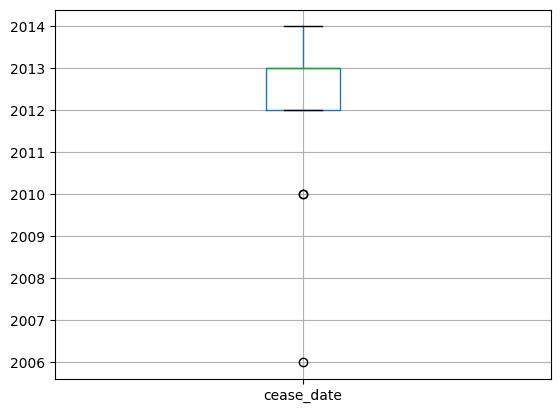

In [22]:
dete_resignations.boxplot(column=['cease_date'])

Above graph shows that the two years *2006* and *2010* are lying outside the box and can be considered as outliers.

<Axes: >

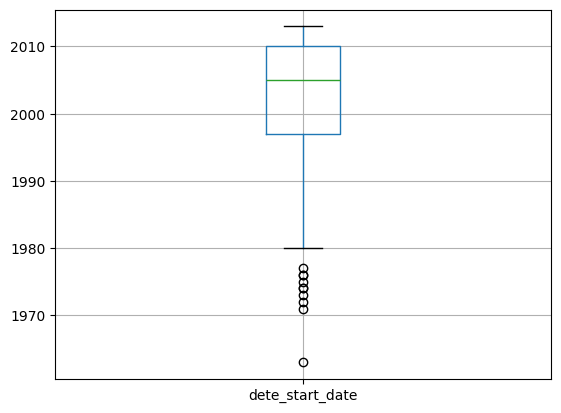

In [23]:
#Apply boxplot() method on dete_resignation_date column of dete_resignations dataset
dete_resignations.boxplot(column=['dete_start_date'])

Above graph shows that the year *1963* and the years between *1970 to 1980* are lying outside the box. These values can be considered as outliers.

<Axes: >

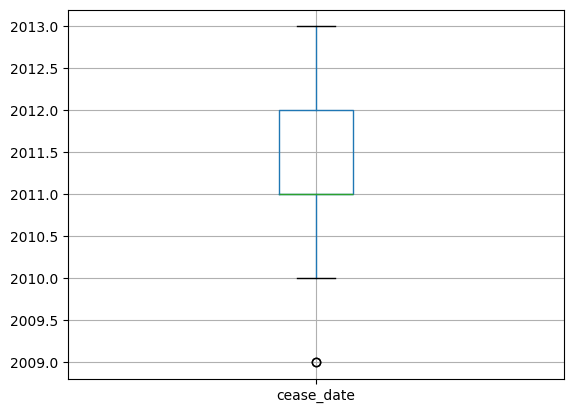

In [24]:
#Apply boxplot() method on cease_dete column of tafe_resignations dataset
tafe_resignations.boxplot(column=['cease_date'])

Above graph shows that the year *2009* is lying outside the box and we can consider it as an outlier.

From the above analysis, we conclude that there aren't any major issues with the years. So we are not going to drop any rows in the dataframe.

## 6. Creating a New Column for the Purpose of Comparison Between the Two DataFrames

Our main objective in here is to find out the percentage of resignations of employees (due to some kind of dissatisfaction) who worked only for a short period of time and to find out the same among employees who worked for longer duration. 

Here we need to look at the years of service (length of time an employee spent in a workplace). *tafe_resignations* dataframe already has a column (service) which has been renamed to *institute_service*. In order to analyze both serveys together we will have to create a corresponding *institute_service* column in *dete_resignations* dataframe as well.

In order to create a service column we will subtract the *dete_start_date* column from the *cease_date* column. 

In [25]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service']

0       7.0
1      18.0
2       3.0
3      14.0
4       NaN
       ... 
306     NaN
307     NaN
308     2.0
309     5.0
310     NaN
Name: institute_service, Length: 311, dtype: float64

## 7. Identifying Dissatisfied Employees

In here we identify the employees who resigned because of dissatisfaction in their jobs. 

First we will look into *tafe_resignations* dataset. Here we list two columns which catogorize the employees as dissatisfied.

* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

Below we will apply *Series.value_counts()* method to look at the values of a perticular column in the dataset.

In [26]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
Name: count, dtype: int64

Above we observe that among 332, 55 resignations are due to *Dissatisfaction* in the jobs.

In [27]:
#apply Series.value_counts() method on 'Contributing Factors. Job Dissatisfaction' column
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
Name: count, dtype: int64

Above we observe that among 332, 62 resignations are due to *Job Dissatisfaction*.

Further we will define a function *update_vals()*. This function returns *np.nan* if the value is 'NaN', returns *False* if the value is "-" and returns *True* if anything else.

In [28]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True    

Below we will pass *update_vals()* function on `Contributing Factors. Dissatisfaction`, `Contributing Factors. Job Dissatisfaction` columns using *df.applymap()* method.

In [29]:
#create a variable which contains all the relevant columns
tafe_Factors = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

#apply df.applymap() method by passing the update_vals() on the columns.
tafe_resignations[tafe_Factors] = tafe_resignations[tafe_Factors].applymap(update_vals)

/tmp/ipykernel_59/3273469846.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tafe_resignations[tafe_Factors] = tafe_resignations[tafe_Factors].applymap(update_vals)


We apply *df.any()* method on the columns of *tafe_Facors*, in order to create a new column called *dissatisfied* in the *tafe_resignations* dataframe. After application, the column will contain following values:

* `True`: indicates a person resigned because they were dissatisfied with the job
* `False`: indicates a person resigned because of the reason other than dissatisfaction with the job
* `NaN`: indicates the value is missing

In [30]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_Factors].any(axis=1, skipna=False)

We will perform the same procedure as earlier on the *dete_resignations* dataset. First we will list all the columns corresponding to '*Job Dissatisfaction'* in a variable called *dete_Factors*. Then apply *df.any()* method on those rows and assign the results to a new column *dissatisfied* in the *dete_resignations* dataset.

**Below we list all the rows corresponding to the *Job Dissatisfaction* in the *dete_resignations* dataset:-**

* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

In [31]:
dete_Factors = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']

dete_resignations['dissatisfied'] = dete_resignations[dete_Factors].any(axis=1, skipna=False)

We will copy the dataset with *df.copy()* method and give it a new name in order to avoid getting *SettingWithCopy* Warning message.

In [32]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

In [33]:
#look at the first five rows of the tafe_resignations_up dataset 
tafe_resignations_up.head()

,index,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
1,4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
2,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
3,6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
4,7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [34]:
#look at the first five rows of the dete_resignations_up dataset 
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
0,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
1,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
2,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
3,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False
4,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True


We successfully segregated the resignations due to *Job Dissatisfaction* in both the datasets and listed them in a new column called *dissatisfied*. This new column will be useful later on in our analysis. 

## 8. Combining the Two DataFrames for Analysis

For our analysis we need to aggreagate the data according to the *institute_service* column in both the dataframes. This column contains time duration of employment. To achieve this first we need to join the two dataframes. After joining these we will keep only those columns with sufficient data points and are required for our analysis. 

Below we will create one more column called *institute* in both the dataframes which specifies the institute name, i.e. *TAFE* or *DETE*. This will help us distinguish between the two datasets once we combine the two.   

In [35]:
dete_resignations_up['institute'] = 'DETE'
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
0,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
1,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
2,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
3,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False,DETE
4,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True,DETE


In [36]:
tafe_resignations_up['institute'] = 'TAFE'
tafe_resignations_up.head()

,index,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
1,4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
2,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
3,6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
4,7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


We have to combine two uneven dataframes. Here uneven implies both the dataframes have different number of rows and columns. For this purpose preferred method is *pd.concat()*. With this we can also stack the datasets vertically. We can later reset the index using *df.reset_index()* method. 

In [37]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

combined = combined.reset_index()
combined

,level_0,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,0,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.300000e+01,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.700000e+01,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,335,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,...,-,-,False,False,-,-,-,-,-,5-6
647,336,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,...,-,-,False,False,-,-,-,-,-,1-2
648,337,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,False,False,-,-,-,-,-,NaN
649,338,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,...,-,-,False,False,-,-,-,Other,-,1-2


We will get rid of all those columns which have less than 500 non null values. This we can achieve by using *df.dropna()* method with *thresh* parameter equal to 500. 

In [38]:
combined_updated = combined.dropna(axis = 1, thresh=500)
combined_updated

,level_0,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,3,1.300000e+01,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14.0,False,DETE
4,4,1.700000e+01,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE
...,...,...,...,...,...,...,...,...,...,...,...
646,335,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,336,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,337,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,338,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


Finally we are left with a single dataset with *651 rows* and just *11 columns*, easing our subsequent analysis. 

## 9. Cleaning and Categorizing the Institute Service Column 

Now we have a single/combined dataframe, we can perform required analysis. Here we will consider the column *institute_service* and try cleaning it up. First, let us take a look at this column. 

In [39]:
#apply Series.value_counts() method on the column
combined_updated['institute_service'].value_counts()

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
22.0                   6
12.0                   6
17.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
32.0                   3
19.0                   3
39.0                   3
21.0                   3
36.0                   2
30.0                   2
26.0                   2
28.0                   2
25.0                   2
38.0   

As we can see, this column contains values in different forms so cleaning it is tricky. The values in the column belongs to *int64* data-type. We will convert the data-type to *string* so that we can apply vectorized string methods on these.

In [40]:
combined_updated.loc[:, 'institute_service'] = combined_updated.loc[:, 'institute_service'].astype('str')
combined_updated.loc[:,'institute_service']

0       7.0
1      18.0
2       3.0
3      14.0
4       nan
       ... 
646     5-6
647     1-2
648     nan
649     5-6
650     3-4
Name: institute_service, Length: 651, dtype: object

Now we can apply *vectorized string methods* on the data and modify them to a required format. First we will apply *Series.str.replace()* method on the data and convert *'Less than 1 year'* to *'1'*, *'More than 20 years'* to *'20'* and *'.'* to *'-'* respectively. Then we will apply *Series.str.split()* method and split the *'-'* and select the 0th value using *Series.str.get()* method. Finally, we will convert the data-type to *float* for further analysis. 

In [41]:
combined_updated.loc[:, 'institute_service'] = combined_updated.loc[:,'institute_service'].str.replace("Less than 1 year", '1')
combined_updated.loc[:, 'institute_service'] = combined_updated.loc[:, 'institute_service'].str.replace("More than 20 years", '20')
combined_updated.loc[:,'institute_service'] = combined_updated.loc[:, 'institute_service'].str.replace(".", "-")

combined_updated.loc[:, 'institute_service'] = combined_updated.loc[:, "institute_service"].str.split("-").str.get(0)

combined_updated['institute_service'].astype('float')

0       7.0
1      18.0
2       3.0
3      14.0
4       NaN
       ... 
646     5.0
647     1.0
648     NaN
649     5.0
650     3.0
Name: institute_service, Length: 651, dtype: float64

In [42]:
#apply value_counts() on the column to check the type of data
combined_updated['institute_service'].value_counts().sort_index(ascending=True)

institute_service
0       20
1      159
10       6
11      30
12       6
13       8
14       6
15       7
16       5
17       6
18       5
19       3
2       14
20      17
21       3
22       6
23       4
24       4
25       2
26       2
27       1
28       2
29       1
3       83
30       2
31       1
32       3
33       1
34       1
35       1
36       2
38       1
39       3
4       16
41       1
42       1
49       1
5       56
6       17
7       34
8        8
9       14
nan     88
Name: count, dtype: int64

Above we performed *Series.value_counts()* method on the *institute_service* column in order to look at different kinds of data and it's counts. We observe that the values range from *0 till 49* and also there is *nan* values. For sorting these values we will define a function called *map_vals()*. This function will map the values into *four different categories* as listed below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

We will also address the *NaN values* in our function.

In [43]:
def map_vals(val):
    if pd.isnull(val):
        return np.nan
    elif float(val) < 3:
        return 'New: Less than 3 years at a company'
    elif 3 <= float(val) <= 6:
        return 'Experienced: 3-6 years at a company'
    elif 7 <= float(val) <= 10:
        return 'Established: 7-10 years at a company'
    elif float(val) >= 11:
        return 'Veteran: 11 or more years at a company'

Below we will apply *map_vals()* function on the *institute_service* column using *Series.apply()* method and store the result in a new column called *service_cat*. We study the new column using *Series.value_counts()* method. 

In [44]:
combined_updated.loc[:,'service_cat'] = combined_updated.loc[:,'institute_service'].apply(map_vals)

combined_updated.loc[:,'service_cat'].value_counts(dropna=False)

/tmp/ipykernel_59/3892576172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated.loc[:,'service_cat'] = combined_updated.loc[:,'institute_service'].apply(map_vals)


service_cat
New: Less than 3 years at a company       193
Experienced: 3-6 years at a company       172
Veteran: 11 or more years at a company    136
None                                       88
Established: 7-10 years at a company       62
Name: count, dtype: int64

We have successfully cleaned and categorized the *institute_service* column. We have put the categorized data in a new column called *service_cat*. Now we can move on to the main analysis of the dataframe.

## 10. Performing the Initial Analysis of Calculating the Percentage of Dissatisfied Employees

Now we are ready for our first analysis. i.e. to `calculate the percentage of dissatisfied employees in all the categories of 'service_cat' column`. The *dissatisfied* column consists of *Boolean values*, meaning they are either *True* or *False*. We also need to find out if there are any *NaN* values. For this purpose we will use *Series.value_counts()* method on the column with *dropna* parameter equal to *False* which will give us the count of *NaN* values as well.

In [45]:
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    403
True     248
Name: count, dtype: int64

We observe that the number of *False* values are *403* and the number of *True* values are *240*. Number of *NaN* values are *8*. Since the number of *False* values are double the number of *True* values, we will replace *NaN* values with *False* values using *Series.fillna()* method.   

In [46]:
combined_updated['dissatisfied'].fillna(value=False).value_counts()

dissatisfied
False    403
True     248
Name: count, dtype: int64

Now we are left with only *True* and *False* values in the *dissatisfied* column of the dataframe. We will apply *DataFrame.pivot_table()* method in order to calculate the percentage of dissatisfied employees in each *service_cat* group. We will name this table as *combined_percent*.

In [47]:
combined_percent = combined_updated.pivot_table(values="dissatisfied", index="service_cat", aggfunc = lambda x: np.mean(x)*100)
combined_percent

,dissatisfied
service_cat,
Established: 7-10 years at a company,51.612903
Experienced: 3-6 years at a company,34.302326
New: Less than 3 years at a company,29.533679
Veteran: 11 or more years at a company,48.529412


We observe that the percentage of all the categories in the above table. Percentage of dissatisfied employees in the `Established category is ~52%`. Percentage of dissatisfied employees in the `Veteran category is ~49%`. Percentage of dissatisfied employees in the `Experience category is ~ 34%`. Percentage of dissatisfied employees in the `New category is ~29%`. Further we will plot this into a *horizontal bar graph* to have a better visual picture and a good understanding of the analysis.

<Axes: title={'center': 'Percentage of dissatisfied employees'}, ylabel='service_cat'>

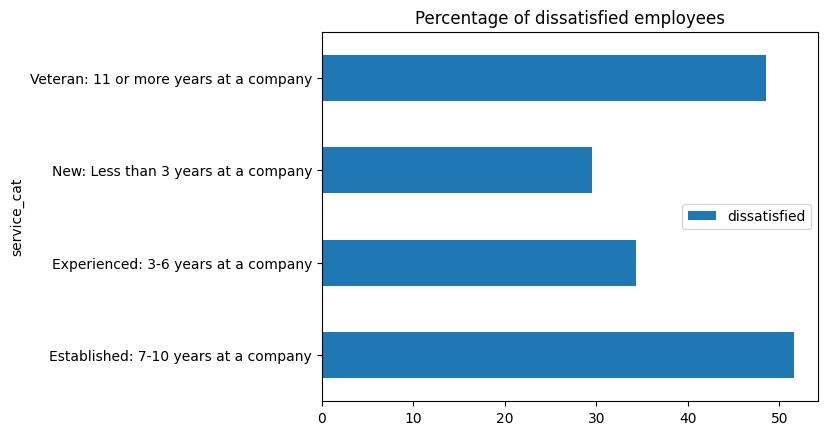

In [48]:
combined_percent.plot(kind='barh', title='Percentage of dissatisfied employees')

## 11. Handling the Missing Values and Calculation of Dissatisfied Employees in Each Career Stage

We are going to check the *missing values* in the *service_cat* column. And figure out how to handle these values.

In [49]:
#apply Series.value_counts() method in order to check the value counts
combined_updated['service_cat'].value_counts(dropna=False)

service_cat
New: Less than 3 years at a company       193
Experienced: 3-6 years at a company       172
Veteran: 11 or more years at a company    136
None                                       88
Established: 7-10 years at a company       62
Name: count, dtype: int64

We observe that there are *88 missing values* among the *service_cat* column. As this is a significant number we will try to incooporate appropriate values insted of dropping these. We will use *Series.fillna()* method with *ffill*. This method would fill the missing values with first non-missing value that occurs before it. We calculated that the distribution of values before and after using *ffill* method are same.

In [50]:
combined_updated['service_cat'].fillna(method='ffill', inplace=True)

combined_updated.loc[:,'service_cat'].value_counts()

/tmp/ipykernel_59/1581458873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_updated['service_cat'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_59/1581458873.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_updated['service_cat'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_59/1581458873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

service_cat
New: Less than 3 years at a company       221
Experienced: 3-6 years at a company       205
Veteran: 11 or more years at a company    153
Established: 7-10 years at a company       72
Name: count, dtype: int64

Above we see that all the missing values have been filled with appropriate values. We apply *df.pivot_table()* method to aggregate the dissatisfied values according to the *service_cat* column. 

In [51]:
combined_updated.pivot_table(values='dissatisfied', index='service_cat', aggfunc=['sum', lambda x: np.mean(x)*100])

,sum,<lambda>
,dissatisfied,dissatisfied
service_cat,,
Established: 7-10 years at a company,38,52.777778
Experienced: 3-6 years at a company,73,35.609756
New: Less than 3 years at a company,67,30.316742
Veteran: 11 or more years at a company,70,45.751634


Above table lists the number of people dissatisfied in each of the service categories. In the *Experienced* service category *70* employees are dissatisfied among 205 employees. In the *Veteran* category *65* employees are dissatisfied among 153 employees. In the *New* category *65* employees are dissatisfied among 221 employees. In the *Established* category *36* employees are dissatisfied among 72 employees.

## 12. Cleaning the Age Column and Studying Resignation due to Dissatisfaction in Each Age Group

In here we are going to clean the *age* column and calculate the number of dissatisfied employees among different age groups. First, we will take  a look at the *age* column using *Series.value_counts()*.

In [52]:
combined_updated['age'].value_counts(dropna=False)

age
51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: count, dtype: int64

Above we observe that the values are not in synchrony. We need to convert these data points into same kind before analysing. For this we convert the data into string type and apply vectorized string methods.  

In [53]:
#convert the age column to string type
combined_updated['age'] = combined_updated['age'].astype('str')
combined_updated['age']

/tmp/ipykernel_59/2541841449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['age'] = combined_updated['age'].astype('str')


0            36-40
1            41-45
2            31-35
3            36-40
4      61 or older
          ...     
646         21  25
647          51-55
648            nan
649          51-55
650         26  30
Name: age, Length: 651, dtype: object

In [54]:
#apply Series.str.replace() method to replace the values to required form
combined_updated.loc[:,'age'] = combined_updated.loc[:,'age'].str.replace("56 or older", "56")
combined_updated.loc[:,'age'] = combined_updated.loc[:,'age'].str.replace("61 or older", "61")
combined_updated.loc[:,'age'] = combined_updated.loc[:,'age'].str.replace("20 or younger", "20")
combined_updated.loc[:,'age'] = combined_updated.loc[:,'age'].str.replace("  ", "-")

#apply Series.str.split() and str.get() method to split the data & select the appropriate value
combined_updated.loc[:,'age'] = combined_updated.loc[:,'age'].str.split("-").str.get(-1)

#convert the data type to float using Series.astype() method
combined_updated.loc[:,'age'] = combined_updated.loc[:, 'age'].astype('float')

In [55]:
#Apply Series.value_counts() in order to have a look at the count of the data
combined_updated.loc[:,'age'].value_counts(dropna=False).sort_index(ascending=True)

age
20.0    10
25.0    62
30.0    67
35.0    61
40.0    73
45.0    93
50.0    81
55.0    71
56.0    29
60.0    26
61.0    23
NaN     55
Name: count, dtype: int64

Now the data is in the desired form. We can proceed with further analysis. Here we will define a function called *map_age()* with a single parameter *val*. This function seggregates the age of employees into different categories. Below are the different age-categories:

* Very Young: Less than 20 years old
* Young: 21 - 40 years old
* Middle Aged: 41 - 59 years old
* Senior: More than 60 years old

In [56]:
def map_age(val):
    if pd.isnull(val):
        return np.nan
    elif float(val) == 20:
        return 'Very Young: Less than 20 years old'
    elif 25 <= float(val) <= 40:
        return 'Young: 21 - 40 years old'
    elif 45 <= float(val) <= 56:
        return 'Middle Aged: 41 - 59 years old'
    elif float(val) >= 60:
        return 'Senior: More than 60 years old'

In [57]:
#Apply the above function on the age column using Series.apply() method
# create the new column and name it 'age_cat'
combined_updated['age_cat'] = combined_updated.loc[:,'age'].apply(map_age)

#Apply Series.value_counts() on the age_cat column
combined_updated['age_cat'].value_counts(dropna=False)

/tmp/ipykernel_59/1477403427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['age_cat'] = combined_updated.loc[:,'age'].apply(map_age)


age_cat
Middle Aged: 41 - 59 years old        274
Young: 21 - 40 years old              263
NaN                                    55
Senior: More than 60 years old         49
Very Young: Less than 20 years old     10
Name: count, dtype: int64

Here we observe that there are *55 missing values* in the 'age' column.  We will use *Series.fillna()* method with ffill. This method would fill the missing values with first non-missing value that occurs before it.

In [58]:
#Apply Series.fillna() with ffill method
combined_updated['age_cat'].fillna(method='ffill', inplace=True)

#Apply Series.value_counts() in order to check the each category
combined_updated['age_cat'].value_counts(dropna=False)

/tmp/ipykernel_59/1053660426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_updated['age_cat'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_59/1053660426.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_updated['age_cat'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_59/1053660426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

age_cat
Middle Aged: 41 - 59 years old        304
Young: 21 - 40 years old              286
Senior: More than 60 years old         50
Very Young: Less than 20 years old     11
Name: count, dtype: int64

Now we have different age categories. Below we are going to aggegate the data using *df.pivot_table()* method and determine the number of dissatisfied employees in each group.

In [59]:
combined_updated.pivot_table(values='dissatisfied', index='age_cat', aggfunc=['sum', lambda x: np.mean(x)*100])

,sum,<lambda>
,dissatisfied,dissatisfied
age_cat,,
Middle Aged: 41 - 59 years old,114,37.500000
Senior: More than 60 years old,27,54.000000
Very Young: Less than 20 years old,3,27.272727
Young: 21 - 40 years old,104,36.363636


We have calculated the number of dissatiafied employees among different age groups. We found that *Middle Aged* category has *110* number of dissatisfied employees among 304 employees. *Senior* category has *27* dissatisfied employees among 50 employees. *Very Young* category has *3* dissatisfied employees among 11 employees. *Young* category has *100* dissatisfied employees among 286 employees.

## 13. Analysis of Dissatisfied Employees in the DETE Survey

Let us first take a look at the *dete_resignations_up* dataframe

In [60]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
0,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
1,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
2,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
3,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False,DETE
4,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True,DETE


We just need *institute_service* and *dissatisfied* columns for our analysis. Let us first apply *value_counts()* method on the *institute_service* column and take a look at the values.

In [61]:
dete_resignations_up['institute_service'].value_counts(dropna=False)

institute_service
NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
15.0     7
20.0     7
12.0     6
17.0     6
10.0     6
22.0     6
14.0     6
18.0     5
16.0     5
23.0     4
24.0     4
11.0     4
32.0     3
39.0     3
19.0     3
21.0     3
28.0     2
36.0     2
26.0     2
25.0     2
30.0     2
38.0     1
33.0     1
41.0     1
49.0     1
34.0     1
31.0     1
35.0     1
29.0     1
27.0     1
42.0     1
Name: count, dtype: int64

Since the values are in the desired format, we can just apply *map_vals(val)* function on the *institute_service* column. We name this new column *Service_cat* and check the value count using *Series.value_counts()* method.

In [62]:
dete_resignations_up['service_cat'] = dete_resignations_up['institute_service'].apply(map_vals)
dete_resignations_up['service_cat'].value_counts(dropna=False)

service_cat
Veteran: 11 or more years at a company    100
Experienced: 3-6 years at a company        76
New: Less than 3 years at a company        56
Established: 7-10 years at a company       41
NaN                                        38
Name: count, dtype: int64

Above table has *38* missing values. We will use *Series.fillna() with method = ffill* to fill the missing values.

In [63]:
dete_resignations_up['service_cat'].fillna(method='ffill', inplace=True)

dete_resignations_up['service_cat'].value_counts()

/tmp/ipykernel_59/3172360625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dete_resignations_up['service_cat'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_59/3172360625.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dete_resignations_up['service_cat'].fillna(method='ffill', inplace=True)


service_cat
Veteran: 11 or more years at a company    113
Experienced: 3-6 years at a company        94
New: Less than 3 years at a company        61
Established: 7-10 years at a company       43
Name: count, dtype: int64

In [64]:
#apply Series.value_counts() on dissatisfied column in order to check the missing values
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

Below we apply *df.pivot_table* in order to calculate the percentage of dissatisfied employees among each service categories. 

In [65]:
dete_percent = dete_resignations_up.pivot_table(values='dissatisfied', index='service_cat', aggfunc= lambda x: np.mean(x)*100)
dete_percent

,dissatisfied
service_cat,
Established: 7-10 years at a company,60.465116
Experienced: 3-6 years at a company,44.680851
New: Less than 3 years at a company,36.065574
Veteran: 11 or more years at a company,52.212389


We observe that in the *dete institute survey*, *Established category* has *~60%* of dissatisfied employees. *Experienced Category* has *~40%* of dissatisfied employees. *New Category* has *~36%* of dissatisfied employees. And *Veteran Category* has *~50%* dissatisfied employees.

## 14. Analysis of Dissatisfied Employees in the TAFE Survey

First we will take a look at the *tafe_resignations* dataframe. We will also take a look at the value counts of *institute_service* column of the dataframe.

In [66]:
tafe_resignations_up.head()

,index,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
1,4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
2,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
3,6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
4,7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [67]:
#Apply Series.value_counts() method on institute_service column
tafe_resignations_up['institute_service'].value_counts(dropna=False)

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: count, dtype: int64

Above we observe that the values are not in the desired format so we need to apply *vectorized string methods* on the *institute_service* column. For that first we will convert the data-type to string type.

In [68]:
tafe_resignations_up['institute_service'].astype('str')

0       nan
1       3-4
2      7-10
3       3-4
4       3-4
       ... 
335     5-6
336     1-2
337     nan
338     5-6
339     3-4
Name: institute_service, Length: 340, dtype: object

In [69]:
#Apply Series.str.replace() method and replace the value to a digit
tafe_resignations_up['institute_service'] = tafe_resignations_up['institute_service'].str.replace('More than 20 years', '20')
tafe_resignations_up['institute_service'] = tafe_resignations_up['institute_service'].str.replace('Less than 1 year', '1')

#Apply Series.str.split() method and split the '-' and extract the value
tafe_resignations_up['institute_service'] = tafe_resignations_up['institute_service'].str.split('-').str[-1]

#convert the datatype to float and count the values
tafe_resignations_up['institute_service'].astype('float')
tafe_resignations_up['institute_service'].value_counts(dropna=False)

institute_service
1      73
2      64
4      63
NaN    50
20     36
6      33
10     21
Name: count, dtype: int64

Now we can apply *map_vals(val)* function on the *institute_service* column and name the new column *service_cat*. Then we will count the values of each category.

In [70]:
tafe_resignations_up['service_cat'] = tafe_resignations_up['institute_service'].apply(map_vals)
tafe_resignations_up['service_cat'].value_counts(dropna=False)

service_cat
New: Less than 3 years at a company       137
Experienced: 3-6 years at a company        96
NaN                                        50
Veteran: 11 or more years at a company     36
Established: 7-10 years at a company       21
Name: count, dtype: int64

Here we observe that there are *50* missing values. We are going to use *Series.fillna() with ffill as method* in order to fill the missing values.

In [71]:
tafe_resignations_up['service_cat'].fillna(method='ffill', inplace=True)

tafe_resignations_up['service_cat'].value_counts()

/tmp/ipykernel_59/691090268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tafe_resignations_up['service_cat'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_59/691090268.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tafe_resignations_up['service_cat'].fillna(method='ffill', inplace=True)


service_cat
New: Less than 3 years at a company       160
Experienced: 3-6 years at a company       110
Veteran: 11 or more years at a company     40
Established: 7-10 years at a company       29
Name: count, dtype: int64

We will also check if there are any missing values in the *dissatisfied* column. We will fill the missing values with a *boolean value* which has 'maximum number of counts'.

In [72]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    241
True      99
Name: count, dtype: int64

In [73]:
#apply Series.fillna() method to fill the missing values with False values
tafe_resignations_up['dissatisfied'].fillna(value=False).value_counts()

dissatisfied
False    241
True      99
Name: count, dtype: int64

Further we can aggregate the data from columns *dissatisfied* and *service category* using *df.pivot_table()* method in order to find the percentage of dissatisfied employees in each service category.

In [74]:
tafe_percent = tafe_resignations_up.pivot_table(values='dissatisfied', index='service_cat', aggfunc= lambda x: np.mean(x)*100)
tafe_percent

,dissatisfied
service_cat,
Established: 7-10 years at a company,41.379310
Experienced: 3-6 years at a company,28.181818
New: Less than 3 years at a company,28.125000
Veteran: 11 or more years at a company,27.500000


We observe that in the *tafe institute survey*, *Established category* has *~37%* of dissatisfied employees. *Experienced Category* has *~26%* of dissatisfied employees. *New Category* has *~27%* of dissatisfied employees. And *Veteran Category* has *~25%* dissatisfied employees.

Clearly among *dete institute survey* and *tafe institute survey*, the former has highest number of dissatisfied employees in all the categories. We can visualize the results using *horizontal bar plot* of *pivot tables* of both the tables.

<Axes: title={'center': 'Percentage of dissatisfied employees-tafe survey'}, ylabel='service_cat'>

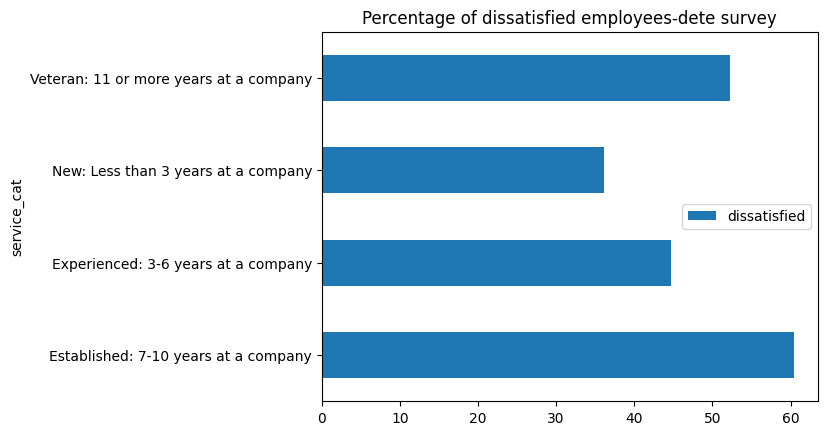

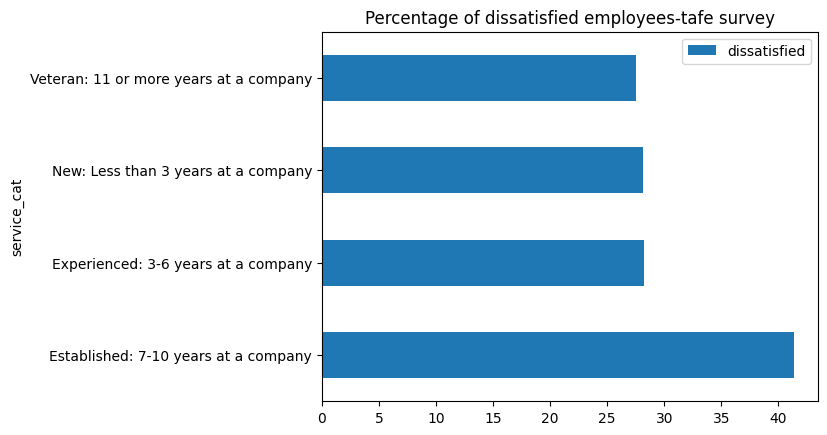

In [75]:
dete_percent.plot(kind='barh', title = 'Percentage of dissatisfied employees-dete survey')
tafe_percent.plot(kind='barh', title = 'Percentage of dissatisfied employees-tafe survey')

`Visualization of both the percentage tables makes it clear that overall job dissatisfaction is more in the *dete institute survey* than *tafe institute survey*.`

## Conclusion

In this project our analysis of the dataset should lead us to answer two distinct querries as addressed in the introduction section. We will take it up one after the other.

**`Addressing the first querry:-`**

 * **Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction?**
 
 If we observe the analysis on the *service category* column of the combined dataset carefully, Among the *new category (less than 3 years of service)* only *~29%* of employees and among *Experienced category (3 to 6 years of service)* only *~34%* of employees have resigned due to some kind of dissatisfaction. This fraction is not much.
 
 
 * **What about the employees who have been there longer?**
  
  Among *Established category (7 to 10 years of service) ~52%* of employees and among *Veteran category (11 or more years of service) ~49%* of employees resigned due to some kind of dissatisfaction. This  is almost half of the employees among these categories. 
  *So we can say that the resignation due to some kind of dissatisfaction among long term employees is higher than the short term employees.*
  
**`Addressing the second querry:-`**
* **Are younger employees resigning due to some kind of dissatisfaction? What about the older employees?**
  
  Among *very young category (less than 20 years of age) ~27%* of employees have resigned due to some kind of dissatisfaction. Among *Young category (20 to 40 years of age) ~35%* of employees and among *Middle Aged category (40 to 60 years old) ~36%* of employees have resigned due to some kind of dissatisfaction. These fractions are not much. The highest resignation is among *Senior category (more than 60 years old)* i.e. *~54%*. 
  *So we can conclude that the resignation among senior employees is higher than the younger employees due to some kind of dissatisfaction*.
  
  